In [2]:
%load_ext autoreload
%autoreload 2

In [106]:
import os
import geopandas as gpd
import geohash
import geohashlite
from polygon_geohasher.polygon_geohasher import polygon_to_geohashes, geohashes_to_polygon
import pandas as pd

from shapely.geometry import shape, Polygon, Point, MultiPolygon

import folium

get_working_dir = os.getcwd()


In [4]:

polygon = Polygon([(-99.1795917, 19.432134), (-99.1656847, 19.429034),
                            (-99.1776492, 19.414236), (-99.1795917, 19.432134)])
inner_geohashes_polygon = geohashes_to_polygon(polygon_to_geohashes(polygon, 7))
outer_geohashes_polygon = geohashes_to_polygon(polygon_to_geohashes(polygon, 7, False))

/home/laia/.pyenv/versions/3.8.12/envs/notebooksenv/lib/python3.8/site-packages/polygon_geohasher/polygon_geohasher.py:56: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  return cascaded_union([geohash_to_polygon(g) for g in geohashes])


In [5]:
outer_geohashes_polygon.__dict__

{'_is_empty': False, '__geom__': 93842706506832, '__p__': None, '_ndim': 2}

In [6]:
outer_geohashes = polygon_to_geohashes(polygon, 6, False)

In [7]:
print(type(outer_geohashes))
print(len(outer_geohashes))
print(outer_geohashes)

<class 'set'>
7
{'9g3qx0', '9g3qx1', '9g3qrn', '9g3qx3', '9g3qx2', '9g3qrr', '9g3qrp'}


In [8]:
city_name = "Kreuzberg"

city_boundary_gdf = gpd.read_file(f'{get_working_dir}/data/{city_name}_boundary.gpkg')
city_boundary_gdf

,name,geometry
0,Kreuzberg,"POLYGON ((13.36858 52.49396, 13.36841 52.49448..."
1,Kreuzberg_buffer,"POLYGON ((13.36442 52.49473, 13.36447 52.49528..."


In [9]:
# presicion 5 grid sieze =	| 4.9km 	| 4.9km
# presicion 6 grid sieze =	| 1.2km 	| 0.6km

outer_geohashes = polygon_to_geohashes(city_boundary_gdf.geometry[1], 6, False)

In [10]:
len(outer_geohashes)

59

In [11]:
# GeoHash to GeoJSON
converter_1 = geohashlite.GeoJsonHasher()
x = ['u09k', 'u095', 'u08g', 'u09h', 'u09e', 'u097']
converter_1.geohash_codes = outer_geohashes
converter_1.decode_geohash(multipolygon=False)
converter_1.geojson

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'geohash': ['u33d9q']},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[13.414306640625, 52.503662109375],
      [13.42529296875, 52.503662109375],
      [13.42529296875, 52.5091552734375],
      [13.414306640625, 52.5091552734375],
      [13.414306640625, 52.503662109375]]]}},
  {'type': 'Feature',
   'properties': {'geohash': ['u33d8r']},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[13.370361328125, 52.5091552734375],
      [13.38134765625, 52.5091552734375],
      [13.38134765625, 52.5146484375],
      [13.370361328125, 52.5146484375],
      [13.370361328125, 52.5091552734375]]]}},
  {'type': 'Feature',
   'properties': {'geohash': ['u33d9u']},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[13.436279296875, 52.49267578125],
      [13.447265625, 52.49267578125],
      [13.447265625, 52.4981689453125],
      [13.436279296875, 52.4981689453125],
      [13.436279296875, 52.49

In [12]:
import pprint

pprint.pprint(converter_1.geojson)

{'features': [{'geometry': {'coordinates': [[[13.414306640625, 52.503662109375],
                                             [13.42529296875, 52.503662109375],
                                             [13.42529296875, 52.5091552734375],
                                             [13.414306640625,
                                              52.5091552734375],
                                             [13.414306640625,
                                              52.503662109375]]],
                            'type': 'Polygon'},
               'properties': {'geohash': ['u33d9q']},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[13.370361328125,
                                              52.5091552734375],
                                             [13.38134765625, 52.5091552734375],
                                             [13.38134765625, 52.5146484375],
                                             [13.370361328125, 52.5146484375]

In [13]:
# bbox = (minlat, minlon, maxlat, maxlon)
# "('52.4827923','13.3682291','52.5093816','13.4529296')"

for geom in converter_1.geojson['features']:
    minlat = geom['geometry']['coordinates'][0][0][1]
    minlon = geom['geometry']['coordinates'][0][0][0]
    maxlat = geom['geometry']['coordinates'][0][2][1]
    maxlon = geom['geometry']['coordinates'][0][2][0]
    
    # print('one',geom['geometry']['coordinates'][0][0],'two',geom['geometry']['coordinates'][0][2])
    print(f'({minlat},{minlon},{maxlat},{maxlon})')

(52.503662109375,13.414306640625,52.5091552734375,13.42529296875)
(52.5091552734375,13.370361328125,52.5146484375,13.38134765625)
(52.49267578125,13.436279296875,52.4981689453125,13.447265625)
(52.49267578125,13.4033203125,52.4981689453125,13.414306640625)
(52.4871826171875,13.38134765625,52.49267578125,13.392333984375)
(52.4761962890625,13.359375,52.481689453125,13.370361328125)
(52.4981689453125,13.392333984375,52.503662109375,13.4033203125)
(52.5091552734375,13.4033203125,52.5146484375,13.414306640625)
(52.4871826171875,13.359375,52.49267578125,13.370361328125)
(52.4871826171875,13.447265625,52.49267578125,13.458251953125)
(52.503662109375,13.447265625,52.5091552734375,13.458251953125)
(52.4981689453125,13.447265625,52.503662109375,13.458251953125)
(52.4871826171875,13.370361328125,52.49267578125,13.38134765625)
(52.4981689453125,13.42529296875,52.503662109375,13.436279296875)
(52.481689453125,13.436279296875,52.4871826171875,13.447265625)
(52.4981689453125,13.359375,52.503662109375

<AxesSubplot:>

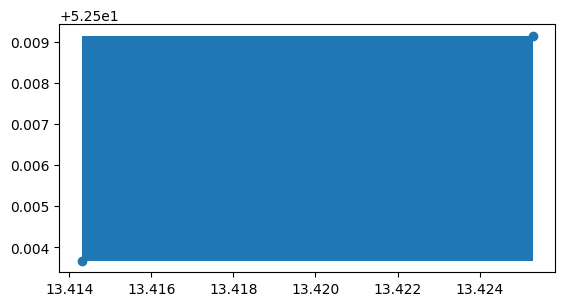

In [14]:
data = [shape(converter_1.geojson['features'][0]['geometry']),
        Point(converter_1.geojson['features'][0]['geometry']['coordinates'][0][0]), 
        Point(converter_1.geojson['features'][0]['geometry']['coordinates'][0][2])]
             
box = gpd.GeoDataFrame({'col' : ['box','point','point2'] , 'geometry' : data }, geometry='geometry')
box.plot()

In [15]:
box

,col,geometry
0,box,"POLYGON ((13.41431 52.50366, 13.42529 52.50366..."
1,point,POINT (13.41431 52.50366)
2,point2,POINT (13.42529 52.50916)


In [16]:
converter_1.geojson['features'][0]['geometry']['coordinates'][0][0]

[13.414306640625, 52.503662109375]

In [17]:
map_test = folium.Map(width=750,
                      height=500,
                      location=[
                          city_boundary_gdf.geometry[0].centroid.y,#lat
                          city_boundary_gdf.geometry[0].centroid.x,#lon
                      ],
                      tiles="openstreetmap",
                      zoom_start=13)

folium.GeoJson(converter_1.geojson).add_to(map_test)
folium.GeoJson(city_boundary_gdf.geometry[1]).add_to(map_test)

In [18]:
map_test

In [19]:
# open testing json file
import json

city_name = 'Kreuzberg'

file_name= os.path.join(get_working_dir, 'data', f'{city_name}_nominatim.json')
f = open(file_name)
city_data = json.load(f)
osm_id = city_data['osm_id'] + 3600000000
osm_id

3600055765

In [20]:
import overpy 
area = '52.503662109375,13.38134765625,52.5091552734375,13.392333984375'
collection = 'building'
feature = 'residential'

query_init = '[out:json][timeout:25];('
# query_area = f'area({area})->.searchArea;('
# query_nodes = f'node["{collection}"="{feature}"]({area});'
# query_ways = f'way["{collection}"="{feature}"]({area});'
query_relations = f'relation["{collection}"="{feature}"]({area});'
# query_output_center = ');out center;'
query_output_all = ');out body;>;out skel qt;'

# Get city boundaries
query = query_init  + query_relations + query_output_all
api = overpy.Overpass()
result = api.query(query)

In [21]:
result.ways

[<overpy.Way id=46096495 nodes=[587630011, 587630012, 9913830521, 9913830520, 9913830519, 9913830522, 587630033, 9913830528, 587630013, 9913830527, 9913830526, 9913830523, 9913830524, 9913830525, 587630011]>,
 <overpy.Way id=46096496 nodes=[587630030, 5633363683, 587630010, 9913830517, 9913830515, 9913830516, 9913830518, 587630014, 587630018, 587630030]>,
 <overpy.Way id=46096499 nodes=[587630014, 587630015, 587630016, 587630023, 587630020, 587630024, 587630022, 587630019, 587630021, 9913830529, 587630018, 587630014]>,
 <overpy.Way id=46096501 nodes=[587630007, 3155470996, 587630005, 587630008, 3785198579, 587630007]>,
 <overpy.Way id=78152353 nodes=[918134575, 918134599, 918134596, 5327017348, 918134593, 918134591, 918134571, 918134575]>,
 <overpy.Way id=112148765 nodes=[1275629049, 3216716126, 3216716124, 1275629012, 1275629042, 3216716082, 3216716089, 3216716086, 3216716088, 3216716081, 3216716080, 1275629062, 1275628992, 1448736846, 1275629049]>,
 <overpy.Way id=112148774 nodes=[32

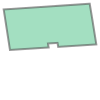

In [22]:
from shapely.geometry import LineString, MultiPolygon
from shapely.ops import linemerge, unary_union, polygonize

#not working for holes inside polygons

def nodes_to_polygons(result):
    poly_list = []
    for way in result.ways:
        poly_list.append(Polygon(LineString([(node.lon, node.lat) for node in way.nodes])))
    return poly_list

def get_tags(result):
    tags = []
    for way in result.ways:
        tags.append(way.tags.get('name',''))
    return tags

features_gdf = gpd.GeoDataFrame({'geometry': nodes_to_polygons(result), 'name': get_tags(result)},crs="EPSG:4326", geometry='geometry')    
features_gdf.geometry[1]


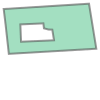

In [23]:
def nodes_to_polygons(result):
    poly_list = []
    ls_coords = []
    for way in result.ways:
        ls_coords.append(LineString([(node.lon, node.lat) for node in way.nodes]))
        
    merged = linemerge([*ls_coords])  # merge LineStrings
    borders = unary_union(merged)  # linestrings to a MultiLineString
    poly_list = list(polygonize(borders))
    mpolys = MultiPolygon(poly_list)

    return poly_list

def get_tags(result):
    tags = []
    for way in result.ways:
        tags.append(way.tags.get('name',''))
    return tags

features_gdf = gpd.GeoDataFrame({'geometry': nodes_to_polygons(result)},crs="EPSG:4326", geometry='geometry')    
features_gdf.geometry[0]

In [24]:
len(get_tags(result))

10

In [25]:
features_gdf.columns

Index(['geometry'], dtype='object')

In [118]:
features_gdf['source'] = 'overpass'
features_gdf

,geometry,source,area
0,"POLYGON ((13.38982 52.50756, 13.39021 52.50759...",overpass,531.900964
1,"POLYGON ((13.38989 52.50657, 13.39037 52.50660...",overpass,1005.875204
2,"POLYGON ((13.38989 52.50749, 13.39000 52.50750...",overpass,79.041155
3,"POLYGON ((13.39002 52.50646, 13.39017 52.50647...",overpass,152.890666
4,"POLYGON ((13.39103 52.50440, 13.39100 52.50458...",overpass,1066.172861
5,"POLYGON ((13.39121 52.50441, 13.39119 52.50453...",overpass,174.243785
6,"POLYGON ((13.39125 52.50713, 13.39150 52.50715...",overpass,278.676038
7,"POLYGON ((13.39169 52.50689, 13.39117 52.50686...",overpass,1311.296146
8,"POLYGON ((13.39169 52.50689, 13.39165 52.50715...",overpass,740.539304
9,"POLYGON ((13.39182 52.50696, 13.39182 52.50697...",overpass,369.148825


In [119]:
import folium 

m = folium.Map(location=[
                          features_gdf.geometry[0].centroid.y,#lat
                          features_gdf.geometry[0].centroid.x,#lon
                      ], zoom_start=18)

m.choropleth(features_gdf, data=features_gdf, 
             columns=['source','geometry'], fill_color='YlOrBr')
m

/home/laia/.pyenv/versions/3.8.12/envs/livablestreetsenv/lib/python3.8/site-packages/folium/folium.py:407: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [29]:
from pyproj import Geod
geod = Geod(ellps="WGS84")

features_gdf['area'] = features_gdf['geometry'].apply(lambda x: abs(geod.geometry_area_perimeter(x)[0]))

In [30]:
features_gdf

,geometry,source,area
0,"POLYGON ((13.38982 52.50756, 13.39021 52.50759...",overpass,531.900964
1,"POLYGON ((13.38989 52.50657, 13.39037 52.50660...",overpass,1005.875204
2,"POLYGON ((13.38989 52.50749, 13.39000 52.50750...",overpass,79.041155
3,"POLYGON ((13.39002 52.50646, 13.39017 52.50647...",overpass,152.890666
4,"POLYGON ((13.39103 52.50440, 13.39100 52.50458...",overpass,1066.172861
5,"POLYGON ((13.39121 52.50441, 13.39119 52.50453...",overpass,174.243785
6,"POLYGON ((13.39125 52.50713, 13.39150 52.50715...",overpass,278.676038
7,"POLYGON ((13.39169 52.50689, 13.39117 52.50686...",overpass,1311.296146
8,"POLYGON ((13.39169 52.50689, 13.39165 52.50715...",overpass,740.539304
9,"POLYGON ((13.39182 52.50696, 13.39182 52.50697...",overpass,369.148825


In [31]:
result.get_way(1081674674)

<overpy.Way id=1081674674 nodes=[9913830514, 9913830513, 9913830512, 9913830511, 9913830510, 9913830509, 9913830508, 9913830507, 9913830506, 9913830514]>

In [32]:
result.get_relation_ids()

[360940, 1183499, 1575897, 14376902, 14390995]

In [33]:
# Relación: 360923
#     Vía 46096312 como outer
#     Vía 46096311 como inner


result.get_relation(360940).members

[<overpy.RelationWay ref=46096496 role=outer>,
 <overpy.RelationWay ref=46096495 role=inner>]

In [34]:
result.get_relation(360940).members[0].role

'outer'

In [35]:
vars(result.get_relation(360940))

{'_result': <overpy.Result at 0x7fca7d5abdf0>,
 'attributes': {},
 'id': 360940,
 'tags': {'building': 'residential',
  'building:levels': '6',
  'type': 'multipolygon'},
 'members': [<overpy.RelationWay ref=46096496 role=outer>,
  <overpy.RelationWay ref=46096495 role=inner>],
 'center_lat': None,
 'center_lon': None}

In [36]:
result.get_relation(360940).__dict__

{'_result': <overpy.Result at 0x7fca7d5abdf0>,
 'attributes': {},
 'id': 360940,
 'tags': {'building': 'residential',
  'building:levels': '6',
  'type': 'multipolygon'},
 'members': [<overpy.RelationWay ref=46096496 role=outer>,
  <overpy.RelationWay ref=46096495 role=inner>],
 'center_lat': None,
 'center_lon': None}

In [37]:
result.relations[0].__dict__

{'_result': <overpy.Result at 0x7fca7d5abdf0>,
 'attributes': {},
 'id': 360940,
 'tags': {'building': 'residential',
  'building:levels': '6',
  'type': 'multipolygon'},
 'members': [<overpy.RelationWay ref=46096496 role=outer>,
  <overpy.RelationWay ref=46096495 role=inner>],
 'center_lat': None,
 'center_lon': None}

In [126]:
int(result.relations[0].tags['building:levels'])

6

In [38]:
result.relations[0].members

[<overpy.RelationWay ref=46096496 role=outer>,
 <overpy.RelationWay ref=46096495 role=inner>]

In [39]:
result.relations[0].members[0].__dict__

{'ref': 46096496,
 '_result': <overpy.Result at 0x7fca7d5abdf0>,
 'role': 'outer',
 'attributes': {},
 'geometry': None}

In [40]:
result.relations[0].members[0]._result.nodes

[<overpy.Node id=587630005 lat=52.5073824 lon=13.3902398>,
 <overpy.Node id=587630007 lat=52.5075630 lon=13.3898188>,
 <overpy.Node id=587630008 lat=52.5073591 lon=13.3898421>,
 <overpy.Node id=587630010 lat=52.5069243 lon=13.3922493>,
 <overpy.Node id=587630011 lat=52.5069618 lon=13.3918244>,
 <overpy.Node id=587630012 lat=52.5069792 lon=13.3920982>,
 <overpy.Node id=587630013 lat=52.5070699 lon=13.3917610>,
 <overpy.Node id=587630014 lat=52.5068884 lon=13.3916900>,
 <overpy.Node id=587630015 lat=52.5068562 lon=13.3911681>,
 <overpy.Node id=587630016 lat=52.5070070 lon=13.3911444>,
 <overpy.Node id=587630018 lat=52.5071509 lon=13.3916494>,
 <overpy.Node id=587630019 lat=52.5072902 lon=13.3914449>,
 <overpy.Node id=587630020 lat=52.5072441 lon=13.3913223>,
 <overpy.Node id=587630021 lat=52.5073019 lon=13.3916163>,
 <overpy.Node id=587630022 lat=52.5073122 lon=13.3913847>,
 <overpy.Node id=587630023 lat=52.5072321 lon=13.3911147>,
 <overpy.Node id=587630024 lat=52.5073090 lon=13.3913111

In [41]:
result.ways[1].nodes[0].__dict__

{'_result': <overpy.Result at 0x7fca7d5abdf0>,
 'attributes': {},
 'id': 587630030,
 'tags': {},
 'lat': Decimal('52.5071881'),
 'lon': Decimal('13.3922066')}

In [42]:
result.__dict__

{'_areas': OrderedDict(),
 '_nodes': OrderedDict([(587630005,
               <overpy.Node id=587630005 lat=52.5073824 lon=13.3902398>),
              (587630007,
               <overpy.Node id=587630007 lat=52.5075630 lon=13.3898188>),
              (587630008,
               <overpy.Node id=587630008 lat=52.5073591 lon=13.3898421>),
              (587630010,
               <overpy.Node id=587630010 lat=52.5069243 lon=13.3922493>),
              (587630011,
               <overpy.Node id=587630011 lat=52.5069618 lon=13.3918244>),
              (587630012,
               <overpy.Node id=587630012 lat=52.5069792 lon=13.3920982>),
              (587630013,
               <overpy.Node id=587630013 lat=52.5070699 lon=13.3917610>),
              (587630014,
               <overpy.Node id=587630014 lat=52.5068884 lon=13.3916900>),
              (587630015,
               <overpy.Node id=587630015 lat=52.5068562 lon=13.3911681>),
              (587630016,
               <overpy.Node id=5876300

In [43]:
result.get_way_ids()

[46096495,
 46096496,
 46096499,
 46096501,
 78152353,
 112148765,
 112148774,
 1080556832,
 1080556833,
 1081674674]

In [44]:
for relation in result.relations:
    for member in relation.members:
        if member.role == 'outer':
            print(member.ref)

46096496
46096501
112148774
1080556833
46096499


In [45]:
for relation in result.relations:
    for member in relation.members:
        if member.role == 'inner':
            print(member.ref)

46096495
78152353
112148765
1080556832
1081674674


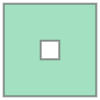

In [48]:
from shapely.geometry import Polygon

# polygon with 1 hole in the middle
p = Polygon(((0,0),(10,0),(10,10),(0,10)), (((4,4),(4,6),(6,6),(6,4)), ))
# POLYGON ((0 0, 10 0, 10 10, 0 10, 0 0), (4 4, 4 6, 6 6, 6 4, 4 4))

# other constructor, does not work (no hole) :
outer = Polygon(((0,0),(10,0),(10,10),(0,10),(0,0)))
inners = Polygon(((4,4),(4,6),(6,6),(6,4),(4,4)))
outer.difference(inners)
# POLYGON ((0 0, 10 0, 10 10, 0 10, 0 0))


In [127]:
mpolys = {}

for relation in result.relations:
    rel = {'outer':[], 'inner':[]}
    
    for member in relation.members:
        
        if member.role == 'inner':
            # print(result.get_way(member.ref))
            poly = Polygon(LineString([(node.lon, node.lat) for node in result.get_way(member.ref).nodes]))
            rel['inner'].append(poly) 
            # print(mpoly)
        if member.role == 'outer':
            # print(result.get_way(member.ref))
            poly = Polygon(LineString([(node.lon, node.lat) for node in result.get_way(member.ref).nodes]))
            rel['outer'].append(poly) 
            # print(mpoly)
        mpolys[relation.id] = rel	
        

In [128]:
mpolys

{360940: {'outer': [<shapely.geometry.polygon.Polygon at 0x7fca7ab48460>],
  'inner': [<shapely.geometry.polygon.Polygon at 0x7fca7ab484f0>]},
 1183499: {'outer': [<shapely.geometry.polygon.Polygon at 0x7fca7ab48520>],
  'inner': [<shapely.geometry.polygon.Polygon at 0x7fca7ab48550>]},
 1575897: {'outer': [<shapely.geometry.polygon.Polygon at 0x7fca7ab48580>],
  'inner': [<shapely.geometry.polygon.Polygon at 0x7fca7ab485b0>]},
 14376902: {'outer': [<shapely.geometry.polygon.Polygon at 0x7fca7ab48610>],
  'inner': [<shapely.geometry.polygon.Polygon at 0x7fca7ab485e0>]},
 14390995: {'outer': [<shapely.geometry.polygon.Polygon at 0x7fca7ab48670>],
  'inner': [<shapely.geometry.polygon.Polygon at 0x7fca7ab48640>]}}

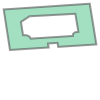

In [51]:
mpolys[360940]['outer'][0].difference( mpolys[360940]['inner'][0])

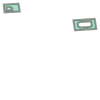

In [52]:
MultiPolygon([ mpolys[360940]['outer'][0] , mpolys[1183499]['outer'][0] ]).difference(
MultiPolygon([ mpolys[360940]['inner'][0] , mpolys[1183499]['inner'][0] ]))

In [101]:
mpoly_2 = {}
for id, rel in mpolys.items():
    mpoly_2[id] = MultiPolygon([*rel['outer'][:]]).difference(MultiPolygon([*rel['inner'][:]]))
    # .difference(mpoly['inner']

In [104]:
mpoly_2

{360940: <shapely.geometry.polygon.Polygon at 0x7fca7d220640>,
 1183499: <shapely.geometry.polygon.Polygon at 0x7fca7d4c4220>,
 1575897: <shapely.geometry.polygon.Polygon at 0x7fca7d2204f0>,
 14376902: <shapely.geometry.polygon.Polygon at 0x7fca7d220100>,
 14390995: <shapely.geometry.polygon.Polygon at 0x7fca7d220ee0>}

In [120]:
mpoly_gdf = gpd.GeoDataFrame({'geometry': [*mpoly_2.values()], 'ids' : [*mpoly_2.keys()]},crs="EPSG:4326", geometry='geometry')
mpoly_gdf

,geometry,ids
0,"POLYGON ((13.39222 52.50708, 13.39225 52.50692...",360940
1,"POLYGON ((13.39021 52.50759, 13.39024 52.50738...",1183499
2,"POLYGON ((13.39037 52.50660, 13.39041 52.50634...",1575897
3,"POLYGON ((13.39100 52.50458, 13.39155 52.50461...",14376902
4,"POLYGON ((13.39117 52.50686, 13.39114 52.50701...",14390995


In [123]:
m_2 = folium.Map(location=[
                          mpoly_gdf.geometry[0].centroid.y,#lat
                          mpoly_gdf.geometry[0].centroid.x,#lon
                      ], zoom_start=18)

m_2.choropleth(mpoly_gdf, columns=['geometry','ids'], key_on='feature.properties.ids', fill_color='YlOrBr')
m_2


/home/laia/.pyenv/versions/3.8.12/envs/livablestreetsenv/lib/python3.8/site-packages/folium/folium.py:407: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [131]:
mpolys = {}

for relation in result.relations:
    rel = {'outer':[], 'inner':[]}
    
    for member in relation.members:
        
        if member.role == 'inner':
            # print(result.get_way(member.ref))
            poly = Polygon(LineString([(node.lon, node.lat) for node in result.get_way(member.ref).nodes]))
            rel['inner'].append(poly) 
            # print(mpoly)
        if member.role == 'outer':
            # print(result.get_way(member.ref))
            poly = Polygon(LineString([(node.lon, node.lat) for node in result.get_way(member.ref).nodes]))
            rel['outer'].append(poly) 
            # print(mpoly)
        mpolys[relation.id] = [MultiPolygon([*rel['outer'][:]]).difference(MultiPolygon([*rel['inner'][:]])), relation.tags['building:levels']]

        

In [132]:
mpolys

{360940: [<shapely.geometry.polygon.Polygon at 0x7fca7ac3a6a0>, '6'],
 1183499: [<shapely.geometry.polygon.Polygon at 0x7fca7ab3afa0>, '4'],
 1575897: [<shapely.geometry.polygon.Polygon at 0x7fca7ab3a940>, '5'],
 14376902: [<shapely.geometry.polygon.Polygon at 0x7fca7ab3ae50>, '8'],
 14390995: [<shapely.geometry.polygon.Polygon at 0x7fca7ab3ab20>, '5']}